<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


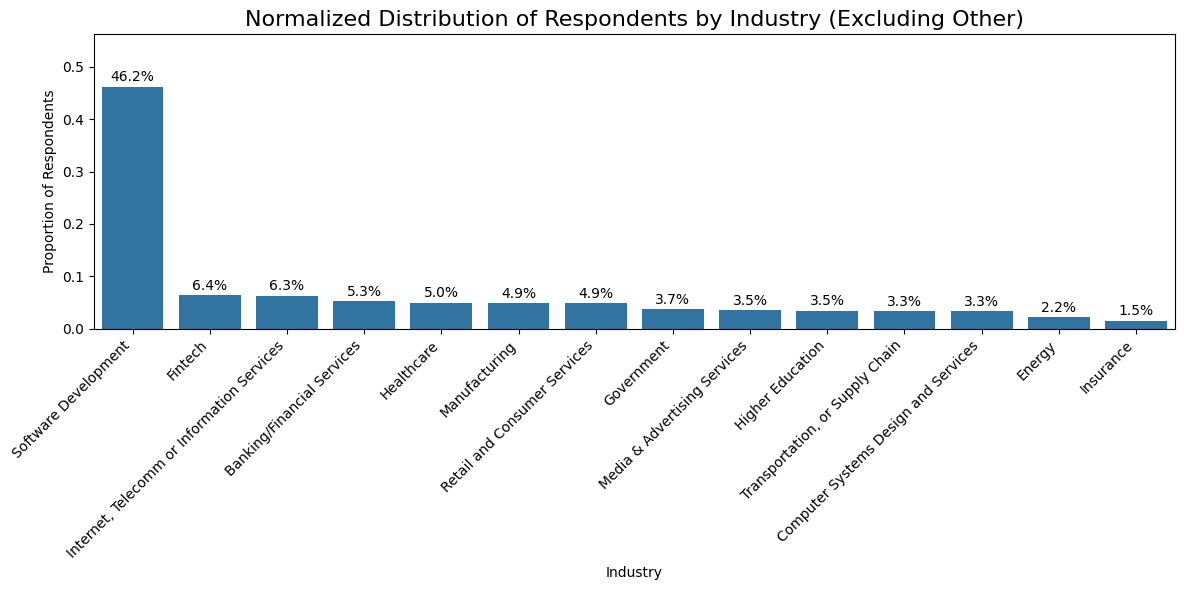

In [11]:
# Step 1: Filter out "Other"
df_filtered = df[df['Industry'] != 'Other:']

# Step 2: Count and normalize
industry_counts = df_filtered['Industry'].value_counts(normalize=True).sort_values(ascending=False)

# Step 3: Plot
plt.figure(figsize=(12,6))
sns.barplot(x=industry_counts.index, y=industry_counts.values)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Industry")
plt.ylabel("Proportion of Respondents")
plt.title("Normalized Distribution of Respondents by Industry (Excluding Other)", fontsize=16)

# Optional: show percentages on top of bars
for i, v in enumerate(industry_counts.values):
    plt.text(i, v + 0.01, f"{v:.1%}", ha='center', fontsize=10)

plt.ylim(0, industry_counts.values.max() + 0.1)  # make space for labels
plt.tight_layout()
plt.show()



<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [12]:
import pandas as pd

# Step 1: Calculate basic statistics
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

print(f"Mean: {mean_comp:.2f}")
print(f"Median: {median_comp:.2f}")
print(f"Standard Deviation: {std_comp:.2f}")

# Step 2: Define a threshold for high outliers (e.g., 3 standard deviations above mean)
threshold = mean_comp + 3 * std_comp
print(f"High Compensation Threshold: {threshold:.2f}")

# Step 3: Identify high compensation respondents
high_comp_outliers = df[df['ConvertedCompYearly'] > threshold]

print(f"Number of high compensation outliers: {len(high_comp_outliers)}")
print(high_comp_outliers[['ConvertedCompYearly']])


Mean: 86155.29
Median: 65000.00
Standard Deviation: 186756.97
High Compensation Threshold: 646426.21
Number of high compensation outliers: 89
       ConvertedCompYearly
529               650000.0
828              1000000.0
1932              945000.0
2171              750000.0
2187             2000000.0
...                    ...
38219            1000000.0
39643            1300000.0
40066             800000.0
40952             750000.0
41027             700000.0

[89 rows x 1 columns]


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [19]:
# Look at the first few values
print(df['ConvertedCompYearly'].head())

# Check min and max
print(df['ConvertedCompYearly'].min())
print(df['ConvertedCompYearly'].max())

# Check summary statistics
print(df['ConvertedCompYearly'].describe())


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: ConvertedCompYearly, dtype: float64
1.0
16256603.0
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


IQR: 75259.50
Lower Bound: -80177.25
Upper Bound: 220860.75
Number of outliers: 978


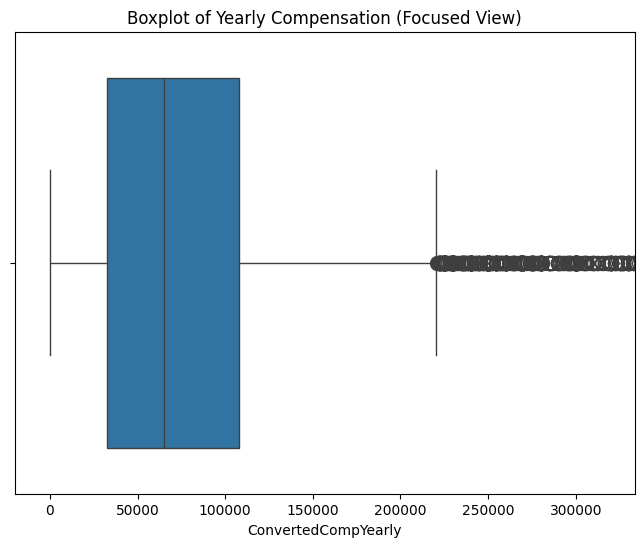

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Step 2: Calculate Interquartile Range (IQR)
IQR = Q3 - Q1
print(f"IQR: {IQR:.2f}")

# Step 3: Determine lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

# Step 4: Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

# Step 5: Visualize outliers using a box plot
plt.figure(figsize=(8,6))
sns.boxplot(x=df['ConvertedCompYearly'], fliersize=10)
plt.xlim(-20000, upper_bound + IQR*1.5)  # Focus on main range
plt.title("Boxplot of Yearly Compensation (Focused View)")
plt.show()



<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [32]:
import pandas as pd

# Step 1: Calculate Q1, Q3, and IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Create a new DataFrame excluding outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                    (df['ConvertedCompYearly'] <= upper_bound)]

# Step 4: Validate the new DataFrame size
print(f"Original dataset size: {len(df)}")
print(f"Dataset size after removing outliers: {len(df_no_outliers)}")
print(f"Number of removed outliers: {len(df) - len(df_no_outliers)}")


Original dataset size: 65437
Dataset size after removing outliers: 22457
Number of removed outliers: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [42]:
df[['Age']]

,Age
0,Under 18 years old
1,35-44 years old
2,45-54 years old
3,18-24 years old
4,18-24 years old
...,...
65432,18-24 years old
65433,25-34 years old
65434,25-34 years old
65435,18-24 years old


In [52]:
print(df['ConvertedCompYearly'].dtype)


float64


/tmp/ipykernel_1696/3486244346.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_numeric'] = df['Age'].map(age_mapping)


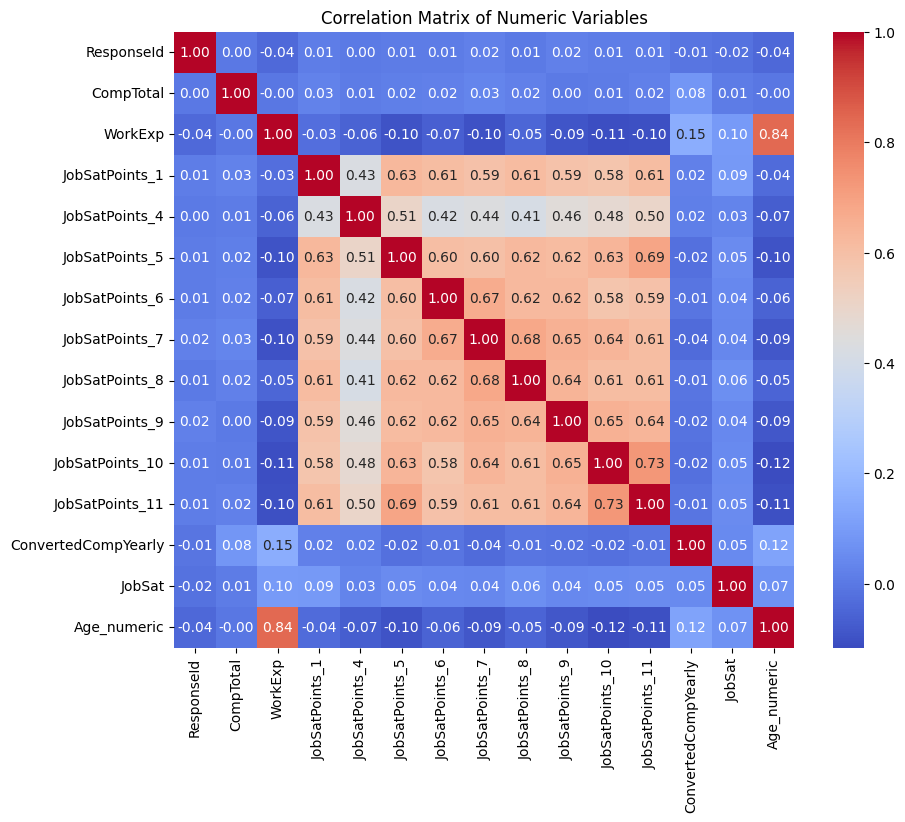

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------
# Step 1: Map Age to numeric values
# ------------------------------
# Replace the age ranges with numeric midpoints
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 or older years old": 67
}

# Create a new column for numeric age
df['Age_numeric'] = df['Age'].map(age_mapping)

# ------------------------------
# Step 2: Select numeric columns
# ------------------------------
numeric_cols = df.select_dtypes(include='number')

# ------------------------------
# Step 3: Compute correlation
# ------------------------------
correlation_matrix = numeric_cols.corr()

# ------------------------------
# Step 4: Visualize full correlation matrix
# ------------------------------
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()



<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
